# PS.5 (Banach's Fixed Point Theorem)

Given $\Phi:[0,1]\rightarrow \mathbb{R}$ with $\Phi(x)=\frac{1}{3}x^2+\frac{1}{2}$, consider the iterative scheme 

$$
x_{k+1}:=\Phi(x_k).
$$

Prove that the sequence $(x_k)_{k\in\mathbb{N}}$ linearly converges for all $x_0\in[0,1]$.

## Solution

We first notice that $\Phi:[0,1]\rightarrow [0,1]$. The derivative satisfies $|\Phi'(x)|=\frac{2}{3}|x|\leq \frac{2}{3}<1$, for all $x\in [0,1]$. Lemma 7.1.7 concludes the proof.

# PS.5 (Banach's Fixed Point Theorem)

Consider the informal expression 

\begin{equation*}
x = \sqrt{2+\sqrt{2+\sqrt{2+\sqrt{\ldots}}}}
\end{equation*}



a) Rewrite the above expression as an iterative scheme $x_{k+1}=...$. 

b) What is the value of $x$ and what are the convergence properties of the iterative scheme?

c) Illustrate the convergence order numerically in julia by plotting $|x_k-x|$ in a logarithmic scale for $k=1,\ldots,20$.

## Solution

a) For $f(x)=\sqrt{2+x}$, the above expression is the limit of 

$$ x_{k+1} = f(x_k). $$

b) We consider $f:[0,2]\rightarrow \mathbb{R}$ and observe $f'(x) = \frac{1}{2\sqrt{2+x}}\geq 0$. Thus, $f$ is monotonically increasing and $f(0)=\sqrt{2}$ and $f(2)=2$ imply

$$ f:[0,2]\rightarrow [0,2].$$

According to $\|f'\|_{[0,2]}\leq \frac{1}{2\sqrt{2}}<1$, Lemma 7.1.7 and Banach's Fix Point Theorem ensures linear convergence of $x_k\rightarrow x=f(x)$. The latter implies

$$ x^2 = 2+x$$

Since $x$ must be positive, we obtain $x=\frac{1}{2}+\sqrt{\frac{1}{4}+2} = 2$.

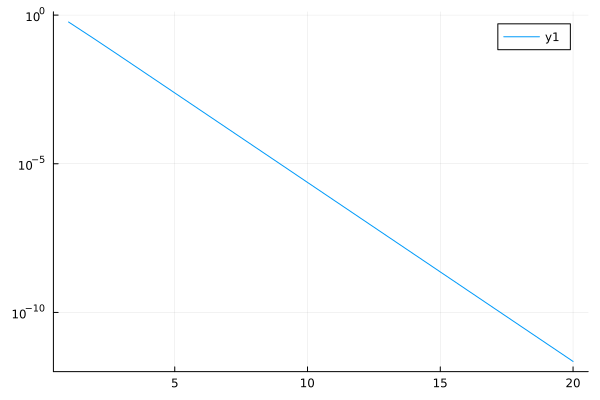

In [1]:
f(x) = sqrt(2+x)
function X(k)
    if k == 0 return 0 end
    return f(X(k-1))
end

xk = X.(1:20)

err = [abs(X(k+1)-2)/abs(X(k)-2) for k in 1:100]
using Plots
plot(err)
plot(abs.(xk.-2),yaxis=:log)

# PS.5 (diagonally dominant)

Consider the matrices
\begin{equation*}
A_1 =\begin{pmatrix}
2&0&1\\
1&2&0\\
0&1&2
\end{pmatrix},
 \qquad 
 A_2 =\begin{pmatrix}
2&0&1\\
1&1&0\\
0&1&1
\end{pmatrix},
\qquad A_3 =\begin{pmatrix}
1&0&1\\
1&1&0\\
0&1&1
\end{pmatrix}.
\end{equation*}

a) Which of these $3$ matrices is strictly diagonally dominant?

b) Investigate the convergence of Jacobi's method with respect to $A_1$, $A_2$, and $A_3$ and the right-hand-side $b=(0,0,0)^\top$ and 
the initial vector $x^{(0)}=(1,1,1)^\top$ by explicitly computing and simplifying the recursion. 


## Solution

a) Only $A_1$ is strictly diagonally dominant. 

b) For $A_1=D_1+N$ with $D_1=2I_3$ and $N=\begin{pmatrix}
0&0&1\\
1&0&0\\
0&1&0
\end{pmatrix}$, we observe

$$ 
M_1 x^{(0)}= -D^{-1}N \begin{pmatrix} 1\\1\\1\end{pmatrix} =-\frac{1}{2} x^{(0)},
$$

so that the iterative scheme $x^{(n)} = M_1^n x^{(0)}$ converges.

For $A_2=D_2+N$ with $D_2={diag}(2,1,1)$, we observe

$$ 
M_2 = -D_2^{-1}N = \begin{pmatrix} 0&0&\frac{1}{2}\\ 1&0&0\\ 0&1&0\end{pmatrix},\qquad M_2^3 = \frac{1}{2}I_3,
$$

so that the iterative scheme $x^{(3n)} = M_2^{3n} x^{(0)}=(\frac{1}{2})^n x^{(0)}$ converges.

For $A_3=D_3+N$ with $D_3=I_3$, we observe

$$ 
M_3  = -D_3^{-1}N = -N,\qquad 
$$

so that the iterative scheme $x^{(n)} = (-N)^n x^{(0)}=(-1)^n x^{(0)}$ does not converge.

# PS.5 (iterative schemes)

**Jacobi:**
\begin{align}
x^{(k+1)}_i &= \frac{1}{a_{i,i}} \left( b_i-\sum_{j\neq i}a_{i,j}x^{(k)}_j \right),\quad i=1,\ldots,n,\\
& = \frac{1}{a_{i,i}} \left( b_i-\sum_{j=1}^n a_{i,j}x^{(k)}_j\right)+x^{(k)}_i
\end{align}

**Gauss-Seidel:**
\begin{equation}
x^{(k+1)}_i = \frac{1}{a_{i,i}} \left( b_i-\sum_{j=1}^{i-1}a_{i,j}x^{(k+1)}_j  - \sum_{j=i+1}^n a_{i,j}x^{(k)}_j\right),\quad i=1,\ldots,n,
\end{equation}

a) Implement both schemes in julia as myJacobi2 and myGaussSeidel2 in-situ, i.e., without keeping all the iterates.

b) Observe the rule of thumb: Gauss-Seidel requires fewer iterations than Jacobi's method.

c) Observe that the simple parallel version of Jacobi's method is indeed faster. (Before starting julia (or jupyter) type in the terminal: 

Mac/Linux:
"export JULIA_NUM_THREADS=8" 

Windows:
"set JULIA_NUM_THREADS=8" 

(or whatever number of cores your processor provides, 2 or 4,...))

In [2]:
using LinearAlgebra
function myJacobi(A, b, x0; tol=1e-5, maxiter=550)      # keep all iterates
    n = size(A,1)
    x = Array{Float64,2}(undef, n, maxiter)
    x[:,1] .= x0
    for k in 1:maxiter-1
        if norm(A*x[:,k]-b)<tol return x[:,1:k] end
        for i in 1:n
            x[i,k+1] = (b[i]-A[i,:]'*x[:,k])/A[i,i]+x[i,k]
        end
    end
    return x    
end

function myJacobi2(A, b, x0; tol=1e-5, maxiter=150)    # only last iterate is kept
    n = size(A,1)
    x_old = copy(x0)
    x_new = copy(x_old) 
    for k in 1:maxiter
        if norm(A*x_new-b)<tol return x_new end
        for i in 1:n
            x_new[i] = (b[i]-A[i,:]'*x_old)/A[i,i]+x_old[i]
        end
        x_old .= x_new
    end
    return x_new    
end

myJacobi2 (generic function with 1 method)

In [3]:
function myGaussSeidel(A, b, x0; tol=1e-5, maxiter=550)
    n = size(A,1)
    x = Array{Float64,2}(undef, n, maxiter)
    x[:,1] .= x0
    for k in 1:maxiter-1
        if norm(A*x[:,k]-b)<tol return x[:,1:k] end
        for i in 1:n
            x[i,k+1] = (b[i]-A[i,1:i-1]'*x[1:i-1,k+1]-A[i,i+1:end]'*x[i+1:end,k])/A[i,i]
        end
    end
    return x    
end

function myGaussSeidel2(A, b, x0; tol=1e-5, maxiter=150)
    n = size(A,1)
    x = copy(x0)
    for k in 1:maxiter
        if norm(A*x-b)<tol return x end
        for i in 1:n
            x[i] = (b[i]-A[i,1:i-1]'*x[1:i-1]-A[i,i+1:end]'*x[i+1:end])/A[i,i]
        end
    end
    return x    
end

myGaussSeidel2 (generic function with 1 method)

In [4]:
for k in 1:10
    n = 100
    A = rand(n,n)+2/3*n*I
    b = randn(n)
    x0 = zeros(n)
    X1 = myJacobi(A, b, x0;tol = 1e-8)
    X2 = myGaussSeidel(A, b, x0;tol = 1e-8)
    @show size(X1,2)
    @show size(X2,2)
    @show norm(A*X1[:,end]-b)
    @show norm(A*X2[:,end]-b);
end

size(X1, 2) = 61
size(X2, 2) = 12
norm(A * X1[:, end] - b) = 8.99664312378121e-9
norm(A * X2[:, end] - b) = 2.6031094543637123e-9
size(X1, 2) = 64
size(X2, 2) = 12
norm(A * X1[:, end] - b) = 8.928331355159808e-9
norm(A * X2[:, end] - b) = 7.2969681462334386e-9
size(X1, 2) = 61
size(X2, 2) = 12
norm(A * X1[:, end] - b) = 8.7338226308693e-9
norm(A * X2[:, end] - b) = 8.012960095697967e-9
size(X1, 2) = 50
size(X2, 2) = 12
norm(A * X1[:, end] - b) = 8.153373296814617e-9
norm(A * X2[:, end] - b) = 5.006661281548826e-9
size(X1, 2) = 62
size(X2, 2) = 12
norm(A * X1[:, end] - b) = 9.491968439009732e-9
norm(A * X2[:, end] - b) = 4.9533306325504745e-9
size(X1, 2) = 56
size(X2, 2) = 11
norm(A * X1[:, end] - b) = 9.10492769558938e-9
norm(A * X2[:, end] - b) = 8.069635504573887e-9
size(X1, 2) = 63
size(X2, 2) = 12
norm(A * X1[:, end] - b) = 7.343851867902788e-9
norm(A * X2[:, end] - b) = 3.286502633889006e-9
size(X1, 2) = 59
size(X2, 2) = 12
norm(A * X1[:, end] - b) = 8.315103875324233e-9
norm(A * 

In [5]:
Threads.nthreads()    

8

In [6]:
function myJacobiParallel(A, b, x0; tol=1e-5, maxiter=50)
    d = size(A,1)
    x = Array{Float64,2}(undef, d, maxiter)
    x[:,1] = copy(x0)
    for k in 1:maxiter
        if norm(A*x[:,k]-b)<tol return x[:,1:k] end
        Threads.@threads for i = 1:d 
            x[i,k+1] = (b[i]-A[i,:]'*x[:,k])/A[i,i]+x[i,k]
        end
    end
    return x    
end

myJacobiParallel (generic function with 1 method)

In [7]:
function testParallel()
    n = 1500
    x₀ = zeros(n)
    A = rand(n,n)/n
    A .= A+I
    b = randn(n)
    println("elapsed time quotient:  parallel / sequential")
    println(@elapsed[myJacobiParallel(A,b,x₀)]/@elapsed[myJacobi(A,b,x₀)])    # parallelized/sequential 
    #@elapsed[myJacobiParallel2(A,b,x₀)]/@elapsed[myJacobi2(A,b,x₀)]     # parallelized/sequential 
end

testParallel()

elapsed time quotient:  parallel / sequential
0.7798055772041309
